### Задание
1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:
a) зависимость цены на недвижимость в еонкретном регионе от времени,
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
в) количество отказов компьютера,
г) число обращений в поликлинику по району,
д) координаты автобуса при движении по маршруту,
е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.
3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.
4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.
5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

#### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:
Кажется, что все, если их значения зависят от конкретного времени.

a), б), г)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
print(os.listdir())
import pandas_profiling

['.DS_Store', '.ipynb_checkpoints', 'covid_19_data.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'homework_1.ipynb', 'Kantаrovich', 'Kantаrovich.rar', 'PJME_hourly.csv', 'Анализ COVID 19_1.ipynb', 'Временные ряды 1.ipynb', 'Временные ряды 1.pptx', 'ДЗ_1 Задание .txt', 'нефть-brent 2010-2019.xlsx']


#### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
pandas_profiling.ProfileReport(df)

In [76]:
df['DUQ_MW'] = df['DUQ_MW'].astype('int')

In [77]:
df['DUQ_MW'].isnull().sum()

0

In [86]:
df['date'] = df.index
df_2010 = df.loc[np.logical_and(np.logical_and(df['date'].dt.year == 2010 , df['date'].dt.month == 1), df['date'].dt.day > 1)]
df_2017 = df.loc[np.logical_and(np.logical_and(df['date'].dt.year == 2017 , df['date'].dt.month == 1), df['date'].dt.day > 1)]

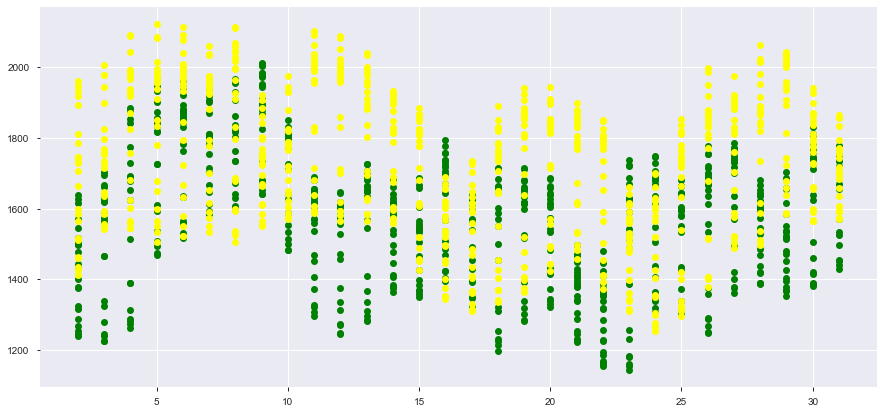

In [87]:
plt.figure(figsize=(15, 7))
plt.plot(df_2017.index.day, df_2017['DUQ_MW'], 'o', color='green')
plt.plot(df_2010.index.day, df_2010['DUQ_MW'], 'o', color='yellow')
plt.show()

In [88]:
#Интересно, что за 7 лет потребление сократилось

In [89]:
df[df.index.year == 2017].head()

,DUQ_MW,date
Datetime,,
2017-01-01 00:00:00,1439,2017-01-01 00:00:00
2017-12-31 01:00:00,1656,2017-12-31 01:00:00
2017-12-31 02:00:00,1619,2017-12-31 02:00:00
2017-12-31 03:00:00,1600,2017-12-31 03:00:00
2017-12-31 04:00:00,1587,2017-12-31 04:00:00


In [91]:
df['2017'].head()

,DUQ_MW,date
Datetime,,
2017-01-01 00:00:00,1439,2017-01-01 00:00:00
2017-12-31 01:00:00,1656,2017-12-31 01:00:00
2017-12-31 02:00:00,1619,2017-12-31 02:00:00
2017-12-31 03:00:00,1600,2017-12-31 03:00:00
2017-12-31 04:00:00,1587,2017-12-31 04:00:00


In [93]:
ut = df['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', df.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [106]:
#Дублирование дат
count_data = df.loc[df['date'].value_counts()>1]
count_data

,DUQ_MW,date
Datetime,,
2014-11-02 02:00:00,1272,2014-11-02 02:00:00
2014-11-02 02:00:00,1240,2014-11-02 02:00:00
2015-11-01 02:00:00,1113,2015-11-01 02:00:00
2015-11-01 02:00:00,1138,2015-11-01 02:00:00
2016-11-06 02:00:00,1121,2016-11-06 02:00:00
2016-11-06 02:00:00,1107,2016-11-06 02:00:00
2017-11-05 02:00:00,1131,2017-11-05 02:00:00
2017-11-05 02:00:00,1105,2017-11-05 02:00:00


In [166]:
#Дни где лишние или пропущенные записи
missed_data = df.resample('d').count()!=24
missed_data[missed_data['date'] == True]

,DUQ_MW,date
Datetime,,
2005-01-01,True,True
2005-04-03,True,True
2005-10-30,True,True
2006-04-02,True,True
2006-10-29,True,True
2007-03-11,True,True
2007-11-04,True,True
2008-03-09,True,True
2008-11-02,True,True


#### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [191]:
df_brent =  pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=None)  

In [192]:
df_brent.head()

,Дата,Значение
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


In [193]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 2 columns):
Дата        2667 non-null datetime64[ns]
Значение    2667 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.8 KB


In [202]:
df_brent.set_index('Дата', inplace=True)

In [205]:
df_brent.resample("W").mean().head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [206]:
df_brent.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [218]:
#Я не понял, что нужно сделать
df_brent.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


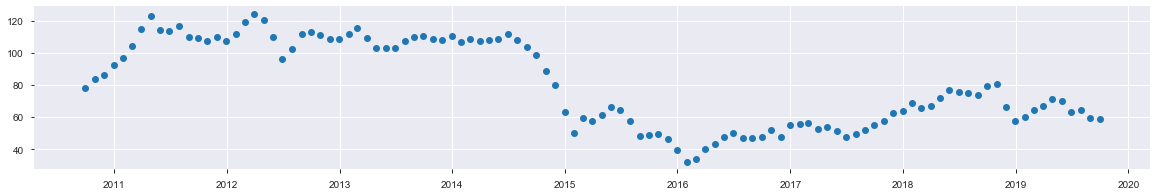

In [211]:
plt.figure(figsize=(20,3))
plt.plot(df_brent.resample("M").mean() ,'o')
plt.show()

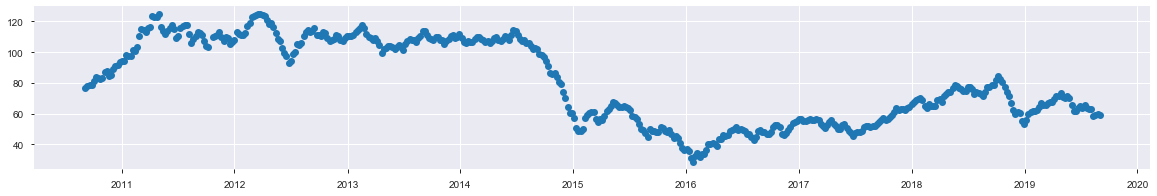

In [216]:
plt.figure(figsize=(20,3))
plt.plot(df_brent.resample("W").mean() ,'o')
plt.show()